Viena užduotis maždaug
vienai paskaitai. Techniniai reikalavimai –
Jupyter Notebook’as arba Streamlit aplinka. Grafikai turi turėti
pavadinimus, ašys pavadintos prasmingai, jei grafike yra daugiau nei
viena kreivė – legenda būtina. Panaudoti boxplot,
swarmplot, heatmap, pairplot, (h)bar,
histogram, scatter. Būtina pasirašyti 1 – 2
sakinius į JupyterNotebook’ą apie tai, ką matote, ką galite
pasakyti iš grafiko (ką matote grafike, 1-2 sakiniai vienam
grafikui, tad jei turėsite 10 grafikų – 20 sakinių).

5  

Duomenys:
https://data.gov.lt/datasets/2829/
- Stacionaro ir ambulatoriniai ligoniai, gydyti nuo traumų ir
apsinuodijimų. Įvertinkite patiriamų traumų, apsinuodijimų
dažnius/pasiskirstymą, sunkumą pagal amžių/amžiaus
grupes, lytį, paros, metų, darbo dienų/švenčių/išeiginių. Ar
traumų pobūdis/dažnis, apsinuodijimų kiekis, pobūdis, sunkumas
priklauso nuo užfiksuotų meteorologinių sąlygų, mėnulio fazės,
švenčių/laisvadienių?
Duomenys:
https://data.gov.lt/datasets/2793/#info
– PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
– Policijos
iškvietimai. Ar
iškvietimų dažnis/kiekis priklauso nuo paros,
metų, darbo dienų/švenčių/išeiginių, mėnulio
fazės, švenčių/laisvadienių?
Mėnulio
fazės turi būti pasiekiamos per http užklausas – iš esmės
pasinaudojate web scrapingu, kad gautumėte norimą informaciją.
Papildoma informacija -
https://ligoniukasa.lrv.lt/lt/veiklos-sritys/informacija-gyventojams/gydymo-ir-sveikatos-prieziuros-paslaugos/stebejimo-paslaugos/
;

TLK kodų paaiškinimai yra šiame excel faile:
https://ligoniukasa.lrv.lt/uploads/ligoniukasa/documents/files/1(9).xlsx

Jūs turėsite sujungti tris failus:
https://data.gov.lt/datasets/2829/data/Pacientas/
https://data.gov.lt/datasets/2829/data/Ligonine/
ir pateiktą excel'io failą, kad turėtumėte vientisą lentelę su reikiamais duomenimis.
Prie jų jungsite infromaciją iš
https://astropixels.com/ephemeris/phasescat/phasescat.html
ARBA day.lt - bus paprasčiau:
https://day.lt/diena/2021.04.22    <--- adreso laukelyje įrašius norimą datą, gaunama informacija apie tą dieną.

iš kurios, naudodami web scraping'ą, išgausite reikiamą informaciją apie fazes. (requests bibliotekos užteks)

Kuriu ir testuoju funkciją, nustatančią mėnulio fazę.

In [ ]:
# pip install ephem --break-system-packages

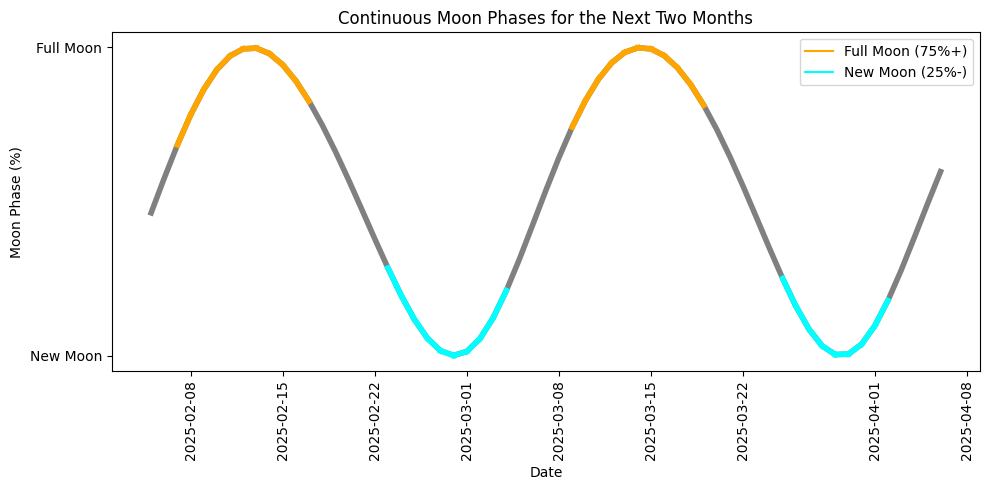

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import pandas as pd
import ephem

# Function to get moon phase as a percentage using ephem
def moon_phase(date: datetime) -> float:
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    return moon.phase  # Return phase as percentage (0-100)

# Updated function with legend corrections and accurate color assignments
def plot_moon_phases_curve(start_date: datetime) -> None:
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='Gray', linestyle='-', marker='', label="Moon Phase", lw=4)
    
    # Marking the Full Moon and New Moon with curve sections
    for i in range(1, len(moon_phases)):
        if moon_phases[i] >= 75:  # Full Moon (near 100%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='orange', linewidth=4)
        elif moon_phases[i] <= 25:  # New Moon (near 0%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='cyan', linewidth=4)
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    
    # Adding the custom legend with colors
    custom_lines = [Line2D([0], [0], color='orange'), 
                    Line2D([0], [0], color='cyan')]
    plt.legend(custom_lines, ['Full Moon (75%+)', 'New Moon (25%-)'], loc='best')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight with corrected legend
plot_moon_phases_curve(datetime(2025, 2, 5))